
# **Customer Retention Artifcial Neural Network**
- Dataset is about bank customers in which we evaluate the customers retaining  prediction.
- We will measure why customers are leaving. 
- We will build a deep learning model to predict the retention 
- At the end we use precision,recall, f1-score to measure the performance of our model.


In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# load Dataset
- Dataset is first upload in the GitHub and then upload in the Google colab via GitHub link.

In [5]:
url="https://raw.githubusercontent.com/adil-imran/Customer-Retention-Deep-Learning/master/Customer_Retention_Modelling.csv"

# Data Preprocessing

In [6]:
df = pd.read_csv(url)
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.shape

(10000, 14)

# Customer Retention Data
- We can see from the Exited columns how many customers left and how many are retined. 

In [10]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [11]:
df[df.Exited==0]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


# Geographic Locations of the Customers

In [12]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

# Data Visualization

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


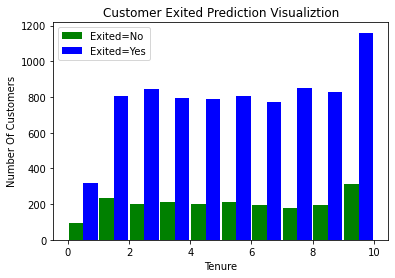

In [13]:
Tenure_Exited_no = df[df.Exited==0].Tenure
Tenure_Exited_yes = df[df.Exited==1].Tenure

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion")


plt.hist([Tenure_Exited_yes, Tenure_Exited_no], rwidth=0.95, color=['green','blue'],label=['Exited=No','Exited=Yes'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


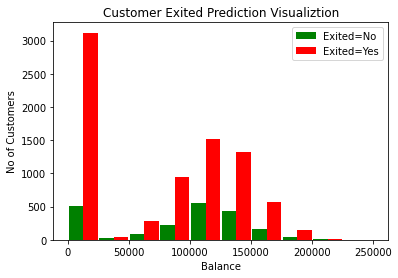

In [14]:
Balance_Exited_no = df[df.Exited==0].Balance
Balance_Exited_yes = df[df.Exited==1].Balance

plt.xlabel("Balance")
plt.ylabel("No of Customers")
plt.title("Customer Exited Prediction Visualiztion")


plt.hist([Balance_Exited_yes, Balance_Exited_no], rwidth=0.95, color=['green','red'],label=['Exited=No','Exited=Yes'])
plt.legend()

# Data Preparation for the Model Testing

## Convert Gender column into Integer

In [15]:
df['Gender'].replace({'Male':1, 'Female':0}, inplace=True)

In [16]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1


## Drop unneccessary column and create new Dataframe

In [17]:
df1 = df.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [18]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


# Create dataframe df2 to scale the data 
- Scaling means data covert into 0 to 1

In [19]:
cat_data = ["Geography","Gender"]
num_data = ["CreditScore","Age","EstimatedSalary","NumOfProducts","Balance","Tenure"]

df2 = pd.get_dummies(data=df1,columns=cat_data)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[num_data] = scaler.fit_transform(df2[num_data])
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_0,Gender_1
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1,1,0


## Unique values displayed in all the over the dataframe

In [21]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

# Train Test Split

In [22]:
X = df2.drop("Exited",axis=1)
y = df2.Exited
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
X_train.shape

(8000, 13)

In [24]:
X_test.shape

(2000, 13)

In [25]:
X_train[:5]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_0,Gender_1
9254,0.672,0.189189,0.6,0.000000,0.333333,1,1,0.895494,1,0,0,0,1
1561,0.564,0.324324,0.4,0.476786,0.333333,1,1,0.979930,0,1,0,0,1
1670,0.418,0.081081,0.3,0.457317,0.000000,1,0,0.429438,0,0,1,0,1
6087,0.422,0.121622,0.9,0.540606,0.000000,1,0,0.765417,1,0,0,1,0
6669,0.334,0.513514,0.9,0.566554,0.000000,0,0,0.197401,1,0,0,0,1


In [26]:
len(X_train.columns)

13

# Bulit a Model by using Tensorflow
- Used RELU and Softmax as an activation
- Choose optimizers as Adam and loss as binary_crossentropy
- We tried 10 epochs on model training

In [27]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(13,), activation='relu'),
    tf.keras.layers.Dense(13, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)


Epoch 1/10
250/250 [==============================] - 3s 3ms/step - loss: 0.5026 - accuracy: 0.7849
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4553 - accuracy: 0.7999
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4336 - accuracy: 0.8114
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4164 - accuracy: 0.8202
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4012 - accuracy: 0.8281
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3865 - accuracy: 0.8344
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3741 - accuracy: 0.8393
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3654 - accuracy: 0.8420
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3597 - accuracy: 0.8480
Epoch 10/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3558 - accuracy: 0.8503

<b> Hurrah! Model secued 85% performance.</b>

## Model Summary

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 13)                429       
                                                                 
 dense_2 (Dense)             (None, 1)                 14        
                                                                 
Total params: 891
Trainable params: 891
Non-trainable params: 0
_________________________________________________________________


## Model Evaluation

In [29]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.3555 - accuracy: 0.8480


[0.35546228289604187, 0.8479999899864197]

In [30]:
y_pred = model.predict(X_test)

In [31]:
y_pred[:5]

array([[0.08620313],
       [0.03465255],
       [0.23485552],
       [0.13843311],
       [0.06320584]], dtype=float32)

In [32]:
y_prediction = []
for element in y_pred:
    if element > 0.5:
        y_prediction.append(1)
    else:
        y_prediction.append(0)

## Classification Report

In [33]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1607
           1       0.72      0.37      0.49       393

    accuracy                           0.85      2000
   macro avg       0.79      0.67      0.70      2000
weighted avg       0.83      0.85      0.83      2000



## Visualize the Model Accuracy by using Confusion Matrix

Text(69.0, 0.5, 'Truth')

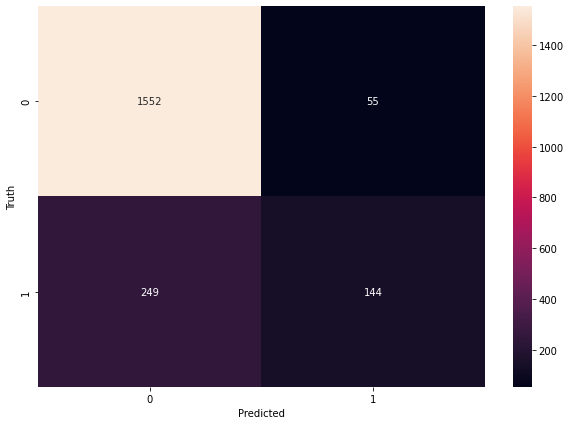

In [35]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_prediction)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Conclusion

## Truth
    - 1552 times found correct and 55 times uncorrect at 0 which is 97% we can see on Recall 0
    - 144 times found correct and 249 times uncorrect at 1 which is 37% we can see on Recall 1

## Predicted
    - 1552 times found correct and 249 times uncorrect at 0 which is 86% we can see on Precision 0
    - 144 times found correct and 55 times uncorrect at 1 which is 72% we can see on Precision 1